In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [3]:

departments_df = pd.read_csv("/content/drive/MyDrive/departments.csv")
orders_df=pd.read_csv("/content/drive/MyDrive/orders.csv")
products_df=pd.read_csv("/content/drive/MyDrive/products.csv")
train_df=pd.read_csv("/content/drive/MyDrive/order_products__train.csv")


In [4]:
print("dept:",departments_df.shape)
print("orders:",orders_df.shape)
print("products:",products_df.shape)
print("train:",train_df.shape)

dept: (21, 2)
orders: (3421083, 7)
products: (49688, 4)
train: (1384617, 4)


In [5]:
top_prod_df=pd.merge(train_df,products_df,on="product_id")
top_prod_df=top_prod_df.drop(['add_to_cart_order','reordered','aisle_id'],axis='columns')
top_prod_df=pd.merge(top_prod_df,departments_df,on="department_id")
top_prod_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1384617 entries, 0 to 1384616
Data columns (total 5 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   order_id       1384617 non-null  int64 
 1   product_id     1384617 non-null  int64 
 2   product_name   1384617 non-null  object
 3   department_id  1384617 non-null  int64 
 4   department     1384617 non-null  object
dtypes: int64(3), object(2)
memory usage: 63.4+ MB


In [6]:
product_counts = top_prod_df.groupby(['product_id','product_name','department_id','department']).size().reset_index(name='count')
#product_counts.info()
temp2=temp2=product_counts[product_counts['department_id'] == 5]
product_counts.sort_values(['department_id', 'count'], ascending=[True, False], inplace=True)
top_10_products_by_department = product_counts.groupby('department_id').head(10)
top_10_products_by_department.head()

,product_id,product_name,department_id,department,count
7167,9076,Blueberries,1,frozen,2323
16574,20995,Organic Broccoli Florets,1,frozen,1361
19299,24489,Organic Whole Strawberries,1,frozen,1213
36851,46802,Pineapple Chunks,1,frozen,1077
14160,17948,Frozen Organic Wild Blueberries,1,frozen,1065


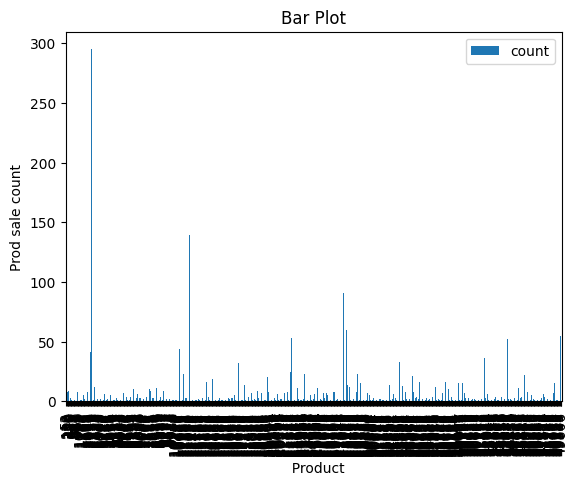

In [ ]:

temp2.plot(x='product_id', y='count', kind='bar')
plt.xlabel('  Product')
plt.ylabel('Prod sale count')
plt.title('Bar Plot')
plt.show()


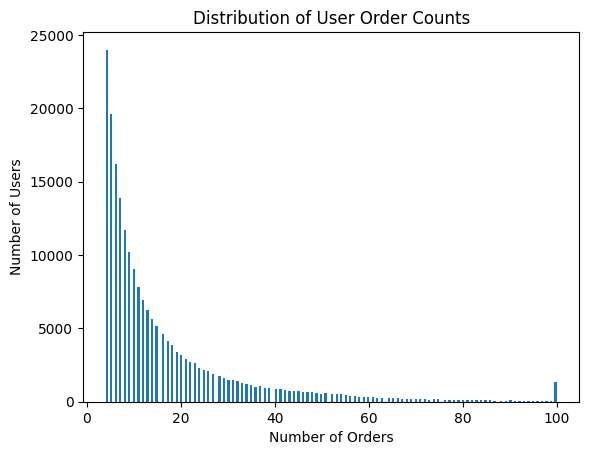

Minimum orders by a user: 4
Maximum orders by a user: 100


In [ ]:
# Group orders by user_id and count number of unique orders
user_order_counts = orders_df.groupby('user_id')['order_id'].nunique()

# Plot histogram of user order counts
plt.hist(user_order_counts, bins=200)
plt.title("Distribution of User Order Counts")
plt.xlabel("Number of Orders")
plt.ylabel("Number of Users")
plt.show()

# Print minimum and maximum orders by users
print("Minimum orders by a user:", user_order_counts.min())
print("Maximum orders by a user:", user_order_counts.max())

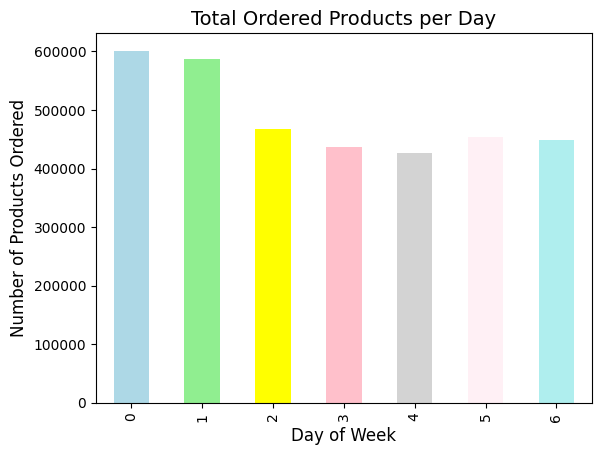

In [ ]:
# Count total ordered products per day
orders_per_day = orders_df.groupby('order_dow')['order_id'].count()

# Set color for each day
colors = ['lightblue', 'lightgreen', 'yellow', 'pink', 'lightgrey', 'lavenderblush', 'paleturquoise']

# Create bar chart
fig, ax = plt.subplots()
orders_per_day.plot(kind='bar', color=colors, alpha=1, ax=ax)

# Add title and labels
ax.set_title('Total Ordered Products per Day', fontsize=14)
ax.set_xlabel('Day of Week', fontsize=12)
ax.set_ylabel('Number of Products Ordered', fontsize=12)

# Show plot
plt.show()

In [7]:
usr_prod_df=pd.merge(orders_df,train_df,on="order_id")
usr_prod_df=usr_prod_df.drop(['eval_set','order_number','order_dow','order_hour_of_day','days_since_prior_order','add_to_cart_order','reordered'],axis='columns')
usr_prod_df.info()
usr_dept_df=pd.merge(usr_prod_df,products_df,on="product_id")
usr_dept_df=usr_dept_df.drop(['aisle_id'],axis='columns')
usr_dept_df.info()
usr_dept_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1384617 entries, 0 to 1384616
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype
---  ------      --------------    -----
 0   order_id    1384617 non-null  int64
 1   user_id     1384617 non-null  int64
 2   product_id  1384617 non-null  int64
dtypes: int64(3)
memory usage: 42.3 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1384617 entries, 0 to 1384616
Data columns (total 5 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   order_id       1384617 non-null  int64 
 1   user_id        1384617 non-null  int64 
 2   product_id     1384617 non-null  int64 
 3   product_name   1384617 non-null  object
 4   department_id  1384617 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 63.4+ MB


,order_id,user_id,product_id,product_name,department_id
0,1187899,1,196,Soda,7
1,2757217,67,196,Soda,7
2,632715,676,196,Soda,7
3,1167274,760,196,Soda,7
4,3347074,804,196,Soda,7
...,...,...,...,...,...
1384612,3351563,206110,22165,Chewy Reduced Sugar Granola Bars Variety Pack,14
1384613,2629221,206125,31540,Plain Flavor Probiotic Acidophilus,11
1384614,2721635,206149,44507,"100% Juice, Rio Red Grapefruit",7
1384615,2078948,206155,47814,Puppy Complete Nutrition Chicken & Beef Dinner...,8


In [8]:

dept_counts = usr_dept_df.sort_values('user_id').groupby(['user_id','department_id']).size().reset_index(name='count')
dept_counts.info()
dept_counts.sort_values(['user_id', 'count'], ascending=[True, False], inplace=True)
top_department = dept_counts.groupby('user_id').head(1)
top_department.info()
top_department.head(10) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640391 entries, 0 to 640390
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   user_id        640391 non-null  int64
 1   department_id  640391 non-null  int64
 2   count          640391 non-null  int64
dtypes: int64(3)
memory usage: 14.7 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 131209 entries, 2 to 640383
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   user_id        131209 non-null  int64
 1   department_id  131209 non-null  int64
 2   count          131209 non-null  int64
dtypes: int64(3)
memory usage: 4.0 MB


,user_id,department_id,count
2,1,16,4
5,2,1,11
12,5,4,4
18,7,7,5
23,8,4,13
32,9,16,11
35,10,1,1
41,13,16,3
47,14,13,4
48,17,4,2


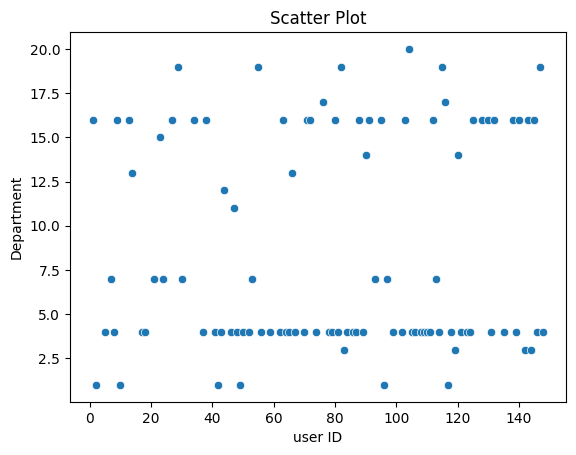

In [ ]:

sns.scatterplot(x='user_id', y='department_id', data=top_department.head(100))
plt.xlabel('user ID')
plt.ylabel('Department')
plt.title('Scatter Plot')
plt.show()

In [9]:
data = usr_dept_df
data = data[['user_id', 'department_id']]  # Keep only relevant columns
data.sort_values(['user_id']).head()
orders = orders_df
order_products = train_df
products = products_df
departments = departments_df

order_products = pd.merge(order_products, products, on='product_id')

data = pd.merge(orders, order_products, on='order_id')

data.head()


data = data.dropna(subset=['product_id']) 
data = data[['user_id', 'product_id']]  
data.head()


,user_id,product_id
0,1,49235
1,1,46149
2,1,196
3,1,27845
4,1,38928


#### Data encoding

In [10]:
le = LabelEncoder()
data['user_id'] = le.fit_transform(data['user_id'])
data['product_id'] = le.fit_transform(data['product_name'])
data.sort_values(['user_id']).head()

sequences = []
for user_id, group in data.groupby('user_id'):
    sequence = list(group['product_name'])
    sequences.append(sequence)
print(sequences[0])


[38771, 36341, 167, 21929, 30655, 20548, 31219, 20805, 8087, 10249, 19808]


In [11]:
out = []
top_department['user_id'] = le.fit_transform(top_department['user_id'])
top_10_products_by_department['product_id'] = le.fit_transform(top_10_products_by_department['product_id'])
for user_id in top_department['user_id']:
    dept_sel=top_department[top_department['user_id']==user_id]['department_id'].values
    #print(user_id,dept_sel)
    out_sub = list(top_10_products_by_department[top_10_products_by_department['department_id']==dept_sel[0]]['product_id'])
    out.append(out_sub)
print(out[0])


<ipython-input-11-157197376753>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_department['user_id'] = le.fit_transform(top_department['user_id'])
<ipython-input-11-157197376753>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_products_by_department['product_id'] = le.fit_transform(top_10_products_by_department['product_id'])


[121, 208, 116, 154, 107, 97, 46, 80, 146, 105]


 Pad sequences to make them all the same length

In [12]:
max_length = max(len(seq) for seq in sequences)
padded_sequences = []
for sequence in sequences:
    num_padding = max_length - len(sequence)
    padded_sequence = sequence + [0] * num_padding
    padded_sequences.append(padded_sequence)
print(padded_sequences[0])

[38771, 36341, 167, 21929, 30655, 20548, 31219, 20805, 8087, 10249, 19808, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### Data Spliting into train and test

In [13]:
X = np.array(padded_sequences) 
y = np.array(out)
sorted_df = top_department.sort_values(by='user_id')
dept_values = sorted_df['department_id'].values
y1=np.array(dept_values)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Training


In [ ]:
model = Sequential()
model.add(LSTM(128, input_shape=(max_length, 1)))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
3281/3281 [==============================] - 392s 119ms/step - loss: 16518.5039 - accuracy: 0.4979
Epoch 2/5
3281/3281 [==============================] - 383s 117ms/step - loss: 16518.4980 - accuracy: 0.4986
Epoch 3/5
3281/3281 [==============================] - 384s 117ms/step - loss: 16518.5195 - accuracy: 0.4986
Epoch 4/5
3281/3281 [==============================] - 389s 118ms/step - loss: 16518.5254 - accuracy: 0.4986
Epoch 5/5
3281/3281 [==============================] - 391s 119ms/step - loss: 16518.5078 - accuracy: 0.4986


In [ ]:
loss,accuracy=model.evaluate(X_test,y_test,batch_size=32)
#print("accuracy : ",accuracy*100,"%")
predictions = model.predict(X)
print(predictions)

4101/4101 [==============================] - 204s 50ms/step
[[8.6007640e-31 2.5796804e-31 3.5254136e-31 ... 1.1636139e-31
  5.7091598e-32 2.8296511e-30]
 [8.6006981e-31 2.5796607e-31 3.5253868e-31 ... 1.1636050e-31
  5.7091598e-32 2.8296511e-30]
 [8.6007640e-31 2.5796804e-31 3.5254136e-31 ... 1.1636139e-31
  5.7091598e-32 2.8296511e-30]
 ...
 [8.6007640e-31 2.5796804e-31 3.5254136e-31 ... 1.1636139e-31
  5.7091598e-32 2.8296511e-30]
 [8.6007640e-31 2.5796804e-31 3.5253868e-31 ... 1.1636139e-31
  5.7091598e-32 2.8296511e-30]
 [8.6007649e-31 2.5796807e-31 3.5254138e-31 ... 1.1636140e-31
  5.7091609e-32 2.8296513e-30]]


In [ ]:
predicted_products = []

for pred in predictions:
    try:
        predicted_products.append(le.inverse_transform([np.argmax(pred)])[0])
    except ValueError:
        predicted_products.append('unknown_label')

print(len(predicted_products))

131209


In [ ]:
predicted_product(1)

['Large Alfresco Eggs',
 'Organic Grade A Free Range Large Brown Eggs',
 'Organic Whole String Cheese',
 '2% Reduced Fat Milk',
 'Unsweetened Almondmilk',
 'Half & Half',
 'Organic Whole Milk',
 'Grated Parmesan',
 'Organic Unsweetened Almond Milk',
 'Organic Half & Half']

### UI

In [14]:
def predicted_product(user_id):
  selected_dept=top_department[top_department['user_id']==user_id]['department_id'].values
  selected_dept = selected_dept.item() 
  filter=top_10_products_by_department[top_10_products_by_department['department_id'] == selected_dept]
  sol=filter['product_id'].values
  filtered_products_df = products_df[products_df['product_id'].isin(sol)] 
  list_of_recomm=(filtered_products_df['product_name'].values)
  temp=[]
  for element in list_of_recomm:
    temp.append(element)
  return temp

In [ ]:
predicted_product(1)

['Large Alfresco Eggs',
 'Organic Grade A Free Range Large Brown Eggs',
 'Organic Whole String Cheese',
 '2% Reduced Fat Milk',
 'Unsweetened Almondmilk',
 'Half & Half',
 'Organic Whole Milk',
 'Grated Parmesan',
 'Organic Unsweetened Almond Milk',
 'Organic Half & Half']

In [15]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 65.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 51.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.5/140.5 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.7/129.7 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.2/286.2 kB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 k

In [18]:
import gradio as gr


def get_output(user_id):
    try:
        output=predicted_product(user_id)
        
        output_str = "\n".join(output)
        
    except:
        output_str = "Error: "
        
    return output_str



input_id = gr.inputs.Number(label="User ID")

output_text = gr.outputs.Textbox(label="Top 10 products")


interface = gr.Interface(fn=get_output, inputs=[input_id], outputs=[output_text], title="Top 10 Products for User", 
                         description="Enter a User ID to get the top 10 products recomended for the user")
interface.launch()

/usr/local/lib/python3.9/dist-packages/gradio/inputs.py:59: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.9/dist-packages/gradio/outputs.py:22: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>